In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_emails = pd.read_csv('data/email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('data/activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,nan,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,nan,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,nan,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,nan,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,nan,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [3]:
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474163 entries, 0 to 474162
Data columns (total 8 columns):
LogId                      474163 non-null int64
EmailSentDateTimeUtc       474163 non-null object
EmailCampaignId            474163 non-null int64
EmailOpenedDateTimeUtc     139822 non-null object
EmailClickedDateTimeUtc    23251 non-null object
UserId                     474163 non-null int64
ZipCode                    322050 non-null float64
AddressData                397932 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 28.9+ MB


In [4]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559973 entries, 0 to 4559972
Data columns (total 3 columns):
UserId               int64
DateOfActivityPST    object
ActivityCount        int64
dtypes: int64(2), object(1)
memory usage: 104.4+ MB


### Question 1. How many rows are in the two datasets? If the log of emails represents 3% of the emails we sent over this period, how many emails did we send? (use python to print the numbers and display them nicely with commas)

In [5]:
num_rows_emails_df = len(df_emails) #number of rows in the emails dataset
num_rows_activity_df = len(df_activity) #number of rows in the activity dataset

#To calculate the total number of emails sent, I will divide the length of the -
#log of emails by 3% as it represents 3% of the emails sent over the period.
total_email_sent = int(num_rows_activity_df/.03)

#Displaying Answer
print("Number of rows in 'email_data':","{:,}".format(num_rows_emails_df))
print("Number of rows in 'activity_data':","{:,}".format(num_rows_activity_df))
print("Total emails sent:","{:,}".format(total_email_sent))
#"{:,}".format(var) - used to display numbers with commas

Number of rows in 'email_data': 474,163
Number of rows in 'activity_data': 4,559,973
Total emails sent: 151,999,100


### Question 2. What are the earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)? (use python to print the date in format mm/dd/yyy hour:minute in 24 hour time)

In [6]:
from datetime import datetime #import datetime library to convert formats
from pytz import timezone #import timezone to convert UTC to PST
    
earliest_sent_email = min(df_emails.EmailSentDateTimeUtc)
#the earliest sent email has the minimum date value
obj_earliest_sent_email = datetime.strptime(earliest_sent_email,
                        '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=timezone('UTC'))
#Converting type to time object in UTC
conv_earliest_sent_email = obj_earliest_sent_email.astimezone(timezone(
                           'US/Pacific')).strftime('%m/%d/%Y %H:%M')
#Converting date to mm/dd/yyyy hour:minute in 24 hour time format in PST

recently_sent_email = max(df_emails.EmailSentDateTimeUtc)
#the most recent email has the maximum date value
obj_recently_sent_email = datetime.strptime(recently_sent_email,
                        '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=timezone('UTC'))
#Converting type to time object in UTC
conv_recently_sent_email = obj_recently_sent_email.astimezone(timezone(
                           'US/Pacific')).strftime('%m/%d/%Y %H:%M')
#Converting date to mm/dd/yyyy hour:minute in 24 hour time format in PST

print("The earliest email sent date:", conv_earliest_sent_email)
print("The most recent email date:",conv_recently_sent_email)

The earliest email sent date: 01/03/2018 20:29
The most recent email date: 04/19/2021 06:45


### Question 3. Which 10 zip codes receive the most emails and how many emails do they receive?

In [7]:
sum(df_emails.ZipCode.isna()) #To find out how many null values exist

152113

In [8]:
top_10_zipcode = df_emails.ZipCode.value_counts().head(10) #Using value_counts function to count 
print("10 Zip codes received the Most emails are following:")
for index in range(10): # Iteration to present answers in complete sentence
    print('Zipcode:',int(top_10_zipcode.index[index]), 
        'received', top_10_zipcode.values[index], 'emails')

10 Zip codes received the Most emails are following:
Zipcode: 63301 received 312 emails
Zipcode: 33801 received 310 emails
Zipcode: 34210 received 299 emails
Zipcode: 38301 received 295 emails
Zipcode: 67460 received 285 emails
Zipcode: 95971 received 277 emails
Zipcode: 42301 received 266 emails
Zipcode: 36104 received 254 emails
Zipcode: 40769 received 234 emails
Zipcode: 85225 received 229 emails


### Question 4.  Plot a single graph. Make sure the graph communicates clearly to team members not used to looking at the data (e.g. the axis make sense, labels are clear, there's a title, etc.) 
Plot two data sets:
1. total distinct users who were sent at least 1 email by month and year.
2. the monthly the percentage of users who were sent an email and were active the same day

In [9]:
df_emails['Sent_Mon_Yr'] = [date[:7] for date in df_emails.EmailSentDateTimeUtc]
#Adding a column to group Month and Year 
active_same_day = [str(df_emails.EmailSentDateTimeUtc.iloc[index][:10]) == 
                   str(df_emails.EmailOpenedDateTimeUtc.iloc[index][:10])
                   if str(df_emails.EmailOpenedDateTimeUtc.iloc[index]) != 'nan'
                   else False
                   for index in range(len(df_emails))]
#Adding a column to check same day email activity
df_emails['Active_Same_Day'] = active_same_day
df_emails.head()

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,nan,NaN,2019-07,False
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,nan,NaN,2019-08,True
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,nan,NaN,2019-08,False
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,nan,NaN,2019-08,False
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,nan,NaN,2019-08,False


In [10]:
df_email_camp_by_Mon_Yr = df_emails.groupby('Sent_Mon_Yr') #Group by Mon_Yr
df_email_camp_count = df_email_camp_by_Mon_Yr.count() 
df_email_camp_count["distinct_Users"]=[len(df_email_camp_by_Mon_Yr.UserId.unique()[date])
                            for date in range(len(df_email_camp_count.index))]
df_email_camp_count["Active_Same_Day"] = df_email_camp_by_Mon_Yr.Active_Same_Day.sum()
df_email_camp_count["Same_Day_Activity_Perc"] = round(df_email_camp_count.Active_Same_Day/df_email_camp_count.UserId*100,1)
#Count Distinct Users each Month
df_email_camp_count.head(10)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,distinct_Users,Same_Day_Activity_Perc
Sent_Mon_Yr,,,,,,,,,,,
2018-01,535,535,535,0,0,535,372,460,0.000,456,0.000
2018-02,672,672,672,0,0,672,474,575,0.000,555,0.000
2018-03,581,581,581,0,0,581,390,489,0.000,492,0.000
2018-04,603,603,603,0,0,603,412,518,0.000,507,0.000
2018-05,1393,1393,1393,0,0,1393,1021,1208,0.000,1217,0.000
2018-06,2646,2646,2646,0,0,2646,1976,2336,0.000,1999,0.000
2018-07,2576,2576,2576,680,0,2576,1908,2252,531.000,1991,20.600
2018-08,3019,3019,3019,909,8,3019,2222,2638,714.000,2345,23.700
2018-09,3459,3459,3459,1003,150,3459,2563,3007,752.000,2643,21.700


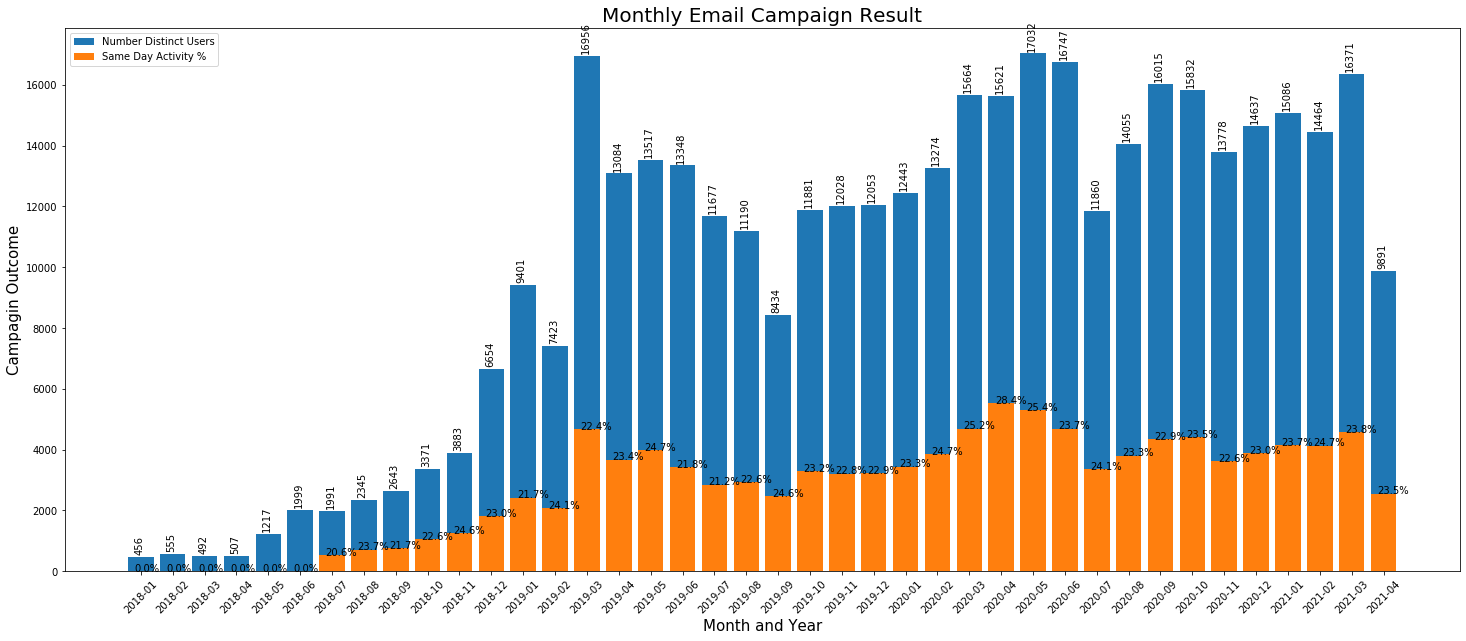

In [11]:
import matplotlib.pyplot as plt #importing library to plot the graph
%matplotlib inline
plt.figure(figsize=[25,10])
x = df_email_camp_count.index
y = df_email_camp_count.distinct_Users
activity = df_email_camp_count.Active_Same_Day
perc = df_email_camp_count.Same_Day_Activity_Perc
plt.bar(x, y, label = 'Number Distinct Users')
plt.bar(x, activity, label='Same Day Activity %')
plt.title("Monthly Email Campaign Result", fontdict={"fontsize":20})
plt.xlabel("Month and Year",fontdict={"fontsize":15})
plt.xticks(rotation=45)
for i in range(len(perc)):
    plt.annotate(s = str(y[i]), xy=(i-.2,y[i]+150), rotation=90)
    plt.annotate(s = str(perc[i])+'%', xy=(i-.2,activity[i]))

plt.ylabel("Campagin Outcome", fontdict={"fontsize":15})
plt.legend(loc='upper left')
plt.savefig('Monthly Email Campaign Result.png',bbox_inches="tight", dpi=300) #save the graph with high quality image
plt.show()

### Question 5. All the emails we send contain at least one link users can click which should send them to the FieldLevel app (where they would login and become active for that day). The team is curious if any of the links are broken. A broken link would be indicated by a record of email sent and clicked but no record of user activity on the day of the click. Estimate how many emails (by EmailCampaignId) may have broken links. If you find an EmailCampaignId that has possible broken links, estimate an upper bound for the number of users it has effected and the probability a user who gets email from us has experienced a broken link multiple times. For your answer, write a paragraph using clear language that non-technical members of the team will understand.

In [12]:
df_clicked_emails = df_emails.loc[df_emails.EmailClickedDateTimeUtc.notna()
                                 ].reset_index() #abstracting data with click action
df_clicked_emails.head()

,index,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day
0,23,412004585826,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,nan,NaN,2020-04,True
1,34,1064081978266,2019-06-19 00:14:17.073,946235214960,2019-06-19 02:35:37.4500000,2019-06-20 03:04:17.0000000,985691563630,nan,NaN,2019-06,True
2,46,963765417634,2018-09-29 21:56:31.980,839979203061,2018-09-29 21:57:21.6833333,2018-09-29 21:57:26.0000000,1076785502778,nan,NaN,2018-09,True
3,64,289347509431,2020-02-04 23:32:55.220,946235214960,NaN,2020-02-05 00:15:05.0000000,59945322238,nan,NaN,2020-02,False
4,78,464878824347,2020-06-14 18:53:53.583,839979203061,2020-06-14 19:30:03.9500000,2020-06-14 19:30:15.0000000,88068707950,nan,NaN,2020-06,True


In [13]:
df_clicked_emails = df_clicked_emails.drop(columns=['index','LogId', 'ZipCode',
                        'AddressData', 'Sent_Mon_Yr', 'Active_Same_Day']) #drop columns to make simple view
df_clicked_emails.head()

,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId
0,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310
1,2019-06-19 00:14:17.073,946235214960,2019-06-19 02:35:37.4500000,2019-06-20 03:04:17.0000000,985691563630
2,2018-09-29 21:56:31.980,839979203061,2018-09-29 21:57:21.6833333,2018-09-29 21:57:26.0000000,1076785502778
3,2020-02-04 23:32:55.220,946235214960,NaN,2020-02-05 00:15:05.0000000,59945322238
4,2020-06-14 18:53:53.583,839979203061,2020-06-14 19:30:03.9500000,2020-06-14 19:30:15.0000000,88068707950


In [14]:
df_clicked_emails['DateClicked'] = [index[:10]
                                    for index in df_clicked_emails.EmailClickedDateTimeUtc]
df_clicked_emails.head() #Date Email Clicked to compare with Date of Activity

,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,DateClicked
0,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14
1,2019-06-19 00:14:17.073,946235214960,2019-06-19 02:35:37.4500000,2019-06-20 03:04:17.0000000,985691563630,2019-06-20
2,2018-09-29 21:56:31.980,839979203061,2018-09-29 21:57:21.6833333,2018-09-29 21:57:26.0000000,1076785502778,2018-09-29
3,2020-02-04 23:32:55.220,946235214960,NaN,2020-02-05 00:15:05.0000000,59945322238,2020-02-05
4,2020-06-14 18:53:53.583,839979203061,2020-06-14 19:30:03.9500000,2020-06-14 19:30:15.0000000,88068707950,2020-06-14


In [15]:
combined_df = pd.merge_ordered(df_clicked_emails, df_activity, 
                fill_method="ffill", left_by="UserId") #join Activity data frame
combined_df.head()

,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,DateClicked,DateOfActivityPST,ActivityCount
0,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14,2020-01-20,32.000
1,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14,2020-01-21,6.000
2,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14,2020-01-26,68.000
3,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14,2020-01-28,1112.000
4,2020-04-14 00:13:20.470,461658501013,2020-04-14 03:15:05.6766667,2020-04-14 03:15:20.0000000,57254519310,2020-04-14,2020-02-02,6.000


In [16]:
Total_clicked_emails = df_clicked_emails.groupby('EmailCampaignId').count().EmailClickedDateTimeUtc
#Count total number of emails clicked from each email campaign

In [17]:
led_to_activity = combined_df.loc[combined_df.DateClicked == 
                combined_df.DateOfActivityPST].groupby('EmailCampaignId'
                ).count().DateOfActivityPST
#Count total emails with same day activity

In [18]:
broken_link_count = pd.merge(Total_clicked_emails, led_to_activity, how='left',
                            on = 'EmailCampaignId')
broken_link_count = broken_link_count.fillna(0)
broken_link_count["possible_broken"] = broken_link_count.EmailClickedDateTimeUtc-broken_link_count.DateOfActivityPST

possible_broken= broken_link_count.loc[broken_link_count.possible_broken > 0]
print("There are about ",len(possible_broken), "possible ")
print("The total estimate of effected users",sum(possible_broken.possible_broken))
possible_broken

There are about  56 possible 
The total estimate of effected users 3257.0


,EmailClickedDateTimeUtc,DateOfActivityPST,possible_broken
EmailCampaignId,,,
9203452516,2,0.000,2.000
39690707224,2,0.000,2.000
82833411612,1870,1287.000,583.000
122198019089,2,0.000,2.000
146804146660,916,790.000,126.000
184779603016,42,34.000,8.000
192312213095,1232,984.000,248.000
202596650716,24,23.000,1.000
238480775934,50,43.000,7.000


In [19]:
multiple_broken_link = df_clicked_emails.groupby('UserId').EmailCampaignId.value_counts()
unstacked = multiple_broken_link.unstack()
filtered = unstacked.filter(items=possible_broken.index)
filtered['row_sum'] = filtered.sum(axis=1)
len(filtered.loc[filtered.row_sum>1])

4013

In [20]:
all_users_effected = len(multiple_broken_link)
users_effected_multiple = len(filtered.loc[filtered.row_sum>1])
probability = round(users_effected_multiple/all_users_effected*100,1)

print("The probability of a user who has experienced a broken link multiple times: {}%".format(probability))

The probability of a user who has experienced a broken link multiple times: 21.1%


#### Conclusion

There are about 56 Email Campagin Id with possible broken links. Please refer to the chart above for the estimate of an upper bound for the number of users it has effected for each Email Campaign ID. The highest possible number of users effected is 3,257.
The probability a user who gets email from FieldLevel has experienced a broken link multiple times is 21.1%.

### Question 6. The team's product manager is thinking we may be sending too much email. Is there a campaign that we should consider no longer sending? (e.g. its performance has never been good). When looking at performance of the emails does time matter or do they perform consistently over time?

In [21]:
df_email_camp_Performance = df_emails.groupby('EmailCampaignId') #Group by Email Campaign ID
df_email_camp_Perf_count = df_email_camp_Performance.count()
df_email_camp_Perf_count.head()

,LogId,EmailSentDateTimeUtc,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day
EmailCampaignId,,,,,,,,,
9203452516,3,3,2,2,3,1,1,3,3
20467726375,2,2,0,0,2,0,1,2,2
39690707224,26,26,14,2,26,13,16,26,26
82833411612,121542,121542,32948,1870,121542,90070,105623,121542,121542
82849832050,2,2,1,0,2,0,0,2,2


A campaign that FieldLevel consider no longer sending would be the Email Campaigns with no conversion rate (Sent email to click). To measure the performance, we will get the converstaion rate of each campagins.

In [22]:
email_clicked = df_email_camp_Perf_count.EmailClickedDateTimeUtc
email_sent = df_email_camp_Perf_count.EmailSentDateTimeUtc
df_email_camp_Perf_count["Performance"] = round(email_clicked/email_sent*100,1)
#Adding Performance Column
df_email_camp_Perf_count

,LogId,EmailSentDateTimeUtc,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day,Performance
EmailCampaignId,,,,,,,,,,
9203452516,3,3,2,2,3,1,1,3,3,66.700
20467726375,2,2,0,0,2,0,1,2,2,0.000
39690707224,26,26,14,2,26,13,16,26,26,7.700
82833411612,121542,121542,32948,1870,121542,90070,105623,121542,121542,1.500
82849832050,2,2,1,0,2,0,0,2,2,0.000
122198019089,304,304,52,2,304,252,270,304,304,0.700
146804146660,3944,3944,2105,916,3944,1897,2858,3944,3944,23.200
158363281699,8,8,3,3,8,4,4,8,8,37.500
184779603016,1931,1931,275,42,1931,1452,1697,1931,1931,2.200


In [23]:
# Observe data to make fair decision
df_email_camp_Perf_count.describe()

,LogId,EmailSentDateTimeUtc,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day,Performance
count,84.000,84.000,84.000,84.000,84.000,84.000,84.000,84.000,84.000,84.000
mean,5644.798,5644.798,1664.548,276.798,5644.798,3833.929,4737.286,5644.798,5644.798,12.865
std,18924.880,18924.880,5208.048,684.519,18924.880,13693.401,16296.449,18924.880,18924.880,18.277
min,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000
25%,7.750,7.750,3.000,0.000,7.750,4.000,6.000,7.750,7.750,0.000
50%,158.500,158.500,55.500,14.500,158.500,94.000,120.500,158.500,158.500,6.750
75%,1441.750,1441.750,419.500,130.250,1441.750,734.000,1026.500,1441.750,1441.750,15.850
max,121542.000,121542.000,32948.000,4216.000,121542.000,90070.000,105623.000,121542.000,121542.000,100.000


Let us target the campaigns that are sent more than 158 times. If the mails were sent less than 158, it would be hard to determine whether the email was successful or not due to lack of data and pick lowest performance emails.

In [24]:
df_email_camp_Perf_count.loc[df_email_camp_Perf_count.EmailClickedDateTimeUtc > 158].sort_values("Performance").head(5)

,LogId,EmailSentDateTimeUtc,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day,Performance
EmailCampaignId,,,,,,,,,,
82833411612,121542,121542,32948,1870,121542,90070,105623,121542,121542,1.500
192312213095,53467,53467,19706,1232,53467,31278,42354,53467,53467,2.300
480484577588,22721,22721,6358,541,22721,16748,19632,22721,22721,2.400
866429603262,13760,13760,4205,372,13760,8295,11062,13760,13760,2.700
479810600058,80269,80269,16628,2248,80269,61534,70893,80269,80269,2.800


Here are 5 lowest converstaion rate Email Campaigns that FieldLevel should consider no longer sending.

Email Campaign Id: 82833411612, 192312213095, 480484577588, 866429603262, and 479810600058 with below 3% conversion rate.

To consider the matter of time on Email performance, let's observe when the emails sent.

In [25]:
def time_performance(camp_Id, df):
    ''' this function is to check the conversion rate of the email by camp_id
    camp_Id: int Campaign Id
    df: data frame to work on'''
    df_perf_time = df.loc[df.EmailCampaignId == camp_Id].groupby("Sent_Mon_Yr").count()
    email_clicked = df_perf_time.EmailClickedDateTimeUtc
    email_sent = df_perf_time.EmailSentDateTimeUtc
    df_perf_time["Performance"] = round(email_clicked/email_sent*100,1)
    return df_perf_time

In [26]:
time_performance(82833411612, df_emails)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,Performance
Sent_Mon_Yr,,,,,,,,,,
2019-01,4177,4177,4177,1068,63,4177,3483,3816,4177,1.500
2019-02,1668,1668,1668,525,66,1668,1374,1528,1668,4.000
2019-03,9695,9695,9695,2817,200,9695,7983,8840,9695,2.100
2019-04,5650,5650,5650,1584,87,5650,4591,5114,5650,1.500
2019-05,6109,6109,6109,1732,80,6109,4961,5533,6109,1.300
2019-06,6824,6824,6824,1820,67,6824,5475,6138,6824,1.000
2019-07,4084,4084,4084,1077,41,4084,3278,3670,4084,1.000
2019-08,3801,3801,3801,1015,58,3801,2987,3386,3801,1.500
2019-09,1016,1016,1016,261,37,1016,788,917,1016,3.600


In [27]:
time_performance(192312213095,df_emails)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,Performance
Sent_Mon_Yr,,,,,,,,,,
2018-11,624,624,624,275,28,624,464,559,624,4.500
2018-12,2106,2106,2106,867,57,2106,1548,1822,2106,2.700
2019-01,1014,1014,1014,390,34,1014,718,863,1014,3.400
2019-02,1011,1011,1011,385,38,1011,743,883,1011,3.800
2019-03,1292,1292,1292,546,39,1292,943,1121,1292,3.000
2019-04,1386,1386,1386,565,30,1386,983,1173,1386,2.200
2019-05,1674,1674,1674,649,27,1674,1178,1427,1674,1.600
2019-06,1149,1149,1149,427,13,1149,768,935,1149,1.100
2019-07,2132,2132,2132,719,30,2132,1457,1808,2132,1.400


In [28]:
time_performance(480484577588, df_emails)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,Performance
Sent_Mon_Yr,,,,,,,,,,
2019-02,150,150,150,37,4,150,128,139,150,2.700
2019-03,2222,2222,2222,634,52,2222,1851,2017,2222,2.300
2019-04,1395,1395,1395,389,29,1395,1130,1250,1395,2.100
2019-05,907,907,907,286,15,907,734,819,907,1.700
2019-06,948,948,948,251,17,948,757,850,948,1.800
2019-07,723,723,723,198,17,723,593,663,723,2.400
2019-08,606,606,606,161,19,606,491,546,606,3.100
2019-09,149,149,149,47,5,149,117,130,149,3.400
2019-10,644,644,644,195,24,644,487,578,644,3.700


In [29]:
time_performance(866429603262, df_emails)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,Performance
Sent_Mon_Yr,,,,,,,,,,
2018-01,450,450,450,0,0,450,309,392,450,0.000
2018-02,585,585,585,0,0,585,413,498,585,0.000
2018-03,501,501,501,0,0,501,333,417,501,0.000
2018-04,490,490,490,0,0,490,327,421,490,0.000
2018-05,507,507,507,0,0,507,340,422,507,0.000
2018-06,312,312,312,0,0,312,208,257,312,0.000
2018-07,361,361,361,143,0,361,221,284,361,0.000
2018-08,548,548,548,217,1,548,333,437,548,0.200
2018-09,631,631,631,224,27,631,404,517,631,4.300


In [30]:
time_performance(479810600058, df_emails)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData,Active_Same_Day,Performance
Sent_Mon_Yr,,,,,,,,,,
2018-11,189,189,189,24,10,189,161,171,189,5.300
2018-12,2418,2418,2418,453,68,2418,2100,2263,2418,2.800
2019-01,2250,2250,2250,440,69,2250,1896,2064,2250,3.100
2019-02,2105,2105,2105,420,48,2105,1788,1944,2105,2.300
2019-03,2440,2440,2440,560,110,2440,2028,2234,2440,4.500
2019-04,2316,2316,2316,535,92,2316,1931,2124,2316,4.000
2019-05,2451,2451,2451,566,78,2451,2026,2265,2451,3.200
2019-06,2514,2514,2514,524,70,2514,2064,2285,2514,2.800
2019-07,2521,2521,2521,492,53,2521,2097,2317,2521,2.100


When looking at the performance of the emails of 5 lowest conversion rate Email Campaigns, it seems like all emails perform consistently over time.

### Question 7. Almost every email that we send has a 'call to action' button that sends users to the FieldLevel app. The team wants to experiment with the way the 'call to action' buttons are designed. They have a new design that they think will encourage more people to click on the button. In order to test the new design the team will select a group of users to experiment on. They plan to separate the users who get email into two 'experimental groups':

1. an 'experiment' group whose emails will have the new button design after the experiment launch data
2. a 'control' group whose email will have the current button design after the experiment launch data. The team wants to have about 50% of the users in the experiment assigned to the 'experiment' group and 50% assigned to the control group. They are using the following rules to assign users to the groups:

3. Users with a userid between 20000000 and 1000000000000 will be included in the experiment
4. Users with a userid greater than 498689408027 will be the 'experiment' group
5. Users with a userid less than or equal to 498689408027 will be the 'control' group

Once the experiment launches the team wants to track changes to the probability of an email getting clicked. In preparation for the experiment launch, plot a graph comparing the probability a user clicks on an email for each of the two experimental groups aggregated on a daily basis. In a paragraph, describe whether you think this is a good experimental design. In particular, what is good about the strategy for assigning users to experimental groups and what concerns do you have.

In [31]:
df_users = df_emails.loc[df_emails.UserId > 20000000]
df_users = df_users.loc[df_users.UserId < 1000000000000]
experiment_gr = df_users.loc[df_users.UserId > 498689408027]
control_gr = df_users.loc[df_users.UserId <= 498689408027]
print(experiment_gr.info())
print(control_gr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216277 entries, 0 to 474162
Data columns (total 10 columns):
LogId                      216277 non-null int64
EmailSentDateTimeUtc       216277 non-null object
EmailCampaignId            216277 non-null int64
EmailOpenedDateTimeUtc     63885 non-null object
EmailClickedDateTimeUtc    10758 non-null object
UserId                     216277 non-null int64
ZipCode                    147077 non-null float64
AddressData                181586 non-null object
Sent_Mon_Yr                216277 non-null object
Active_Same_Day            216277 non-null bool
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 16.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 216312 entries, 1 to 474158
Data columns (total 10 columns):
LogId                      216312 non-null int64
EmailSentDateTimeUtc       216312 non-null object
EmailCampaignId            216312 non-null int64
EmailOpenedDateTimeUtc     63913 non-null object
EmailClick

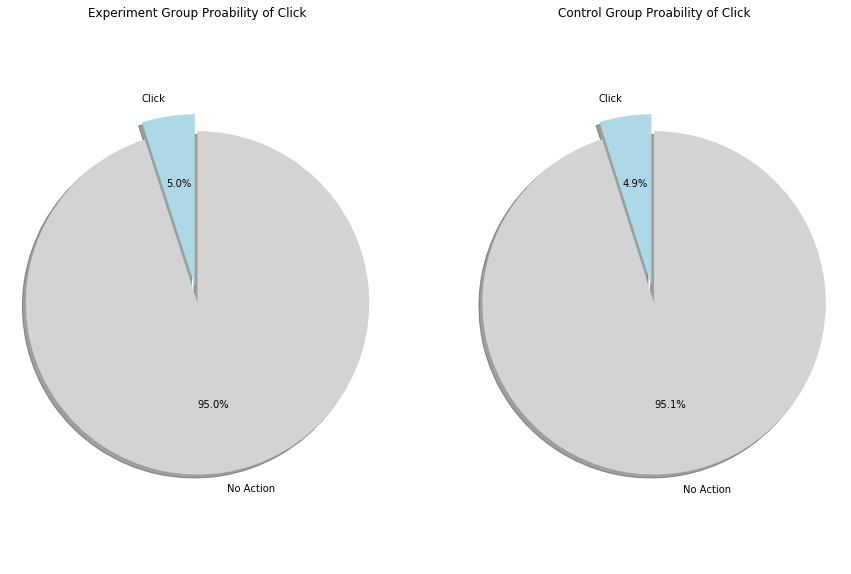

In [32]:
labels = ['Click', 'No Action']
colors = ['lightblue', 'lightgrey']
exp_click = experiment_gr.EmailClickedDateTimeUtc.count()
exp_no_action = len(experiment_gr)-exp_click
exp_ratio = [exp_click, exp_no_action]

con_click = control_gr.EmailClickedDateTimeUtc.count()
con_no_action = len(control_gr) - con_click
con_ratio = [con_click, con_no_action]

explode = (0, 0.1) 

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.pie(exp_ratio, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Experiment Group Proability of Click')

ax2.pie(con_ratio, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = colors, shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Control Group Proability of Click')


plt.show()

####  Conclusion

Overall, it seems like the experimental design is a good fit to abstract the hypothesis of impact of 'call to action' button design. Both parties are selected at random with no particular characteristics, which could make an impact on the descision such as gender, age, location, etc. Data is well balanced between experiment and control groups with similar probability of clicking ratio. It is hard to start the experiment with well balanced data set with similar conditions and it will be a good opportunity to test the hypothesis. The only concern would be the size of the test group which is over 200k. With larger test group, more resource will be used to test the hypothesis. Thus, it is recommended to reduce the sample size to test the hypothesis if there is limited resource.


### Question 8. Finally, the product manager is worried emails are not having the impact we think. In particular they are concerned that unengaged users (users who have not logged into FieldLevel for 6 months) do not open or click on emails and because of this, efforts to re-engage users that focus on email will not be effective. The PM would like you to explore whether there is evidence that emails are effective with engaged users (users who log in without emails prompting them) but not effective on unengaged users. Explore the data, visualizing the relationship between emails sent and user activity both in login and activity count. Write a paragraph to support or argue against the product managers concern. Use statistical methods support your conclusion but balance that with plain language that non-technical users can understand.

Classification: active (engaged users) vs inactive (unengaged users)

In [33]:
email_user_id = df_emails.UserId.unique()
print("# of all users contacted",len(email_user_id))
activity_user_id = df_activity.UserId.unique()
print("# Active and inactive users",len(activity_user_id))

# of all users contacted 107325
# Active and inactive users 90051


In [34]:
user_status_df = df_activity.groupby('UserId').max().DateOfActivityPST
user_status_df = user_status_df.reset_index()
user_status_df['Class'] = ["Engaged" if date > '2020-12-17' else "Unengaged" 
                           for date in user_status_df.DateOfActivityPST]

user_status_df=user_status_df.rename(columns= {"DateOfActivityPST":"DateOfLastActivityPST"})
user_status_df.head()

,UserId,DateOfLastActivityPST,Class
0,16210065,2021-04-10,Engaged
1,50599266,2021-04-05,Engaged
2,61171096,2020-08-16,Unengaged
3,63866065,2021-04-07,Engaged
4,68690748,2021-04-17,Engaged


In [35]:
#Class Balance Check 
user_status_df.Class.value_counts(normalize=True)

Engaged     0.514
Unengaged   0.486
Name: Class, dtype: float64

Effectiveness can be determined by the email activity. Email sent to users and activity was found.

In [36]:
user_status_df=user_status_df.merge(df_emails, how='right', on='UserId')
user_status_df.head()

,UserId,DateOfLastActivityPST,Class,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,ZipCode,AddressData,Sent_Mon_Yr,Active_Same_Day
0,16210065,2021-04-10,Engaged,250805173350,2020-09-09 02:25:59.690,861847429503,NaN,NaN,98233.000,"{'DataType':'Address','ZipCode':'98233'}",2020-09,False
1,16210065,2021-04-10,Engaged,623147011640,2020-11-24 18:29:23.933,82833411612,NaN,NaN,98233.000,"{'DataType':'Address','ZipCode':'98233'}",2020-11,False
2,50599266,2021-04-05,Engaged,869772650627,2021-03-10 22:10:40.767,192312213095,NaN,NaN,nan,NaN,2021-03,False
3,50599266,2021-04-05,Engaged,381342538386,2020-12-09 20:03:59.567,319208351769,NaN,NaN,nan,NaN,2020-12,False
4,61171096,2020-08-16,Unengaged,1002584531043,2019-07-27 16:16:30.713,192312213095,2019-07-27 19:01:02.1566667,NaN,31093.000,"{'DataType':'Address','ZipCode':'31093'}",2019-07,True


In [37]:
no_activity_df = user_status_df.loc[user_status_df.EmailClickedDateTimeUtc.isna()].loc[
    user_status_df.EmailOpenedDateTimeUtc.isna()]
print(no_activity_df.Class.value_counts())
print(no_activity_df.Class.value_counts(normalize=True))

Engaged      150075
Unengaged    127079
Name: Class, dtype: int64
Engaged     0.541
Unengaged   0.459
Name: Class, dtype: float64


In [38]:
activity_df = user_status_df.loc[user_status_df.EmailClickedDateTimeUtc.notna()]
print(activity_df.Class.value_counts())
print(activity_df.Class.value_counts(normalize=True))

Engaged      19361
Unengaged     3783
Name: Class, dtype: int64
Engaged     0.837
Unengaged   0.163
Name: Class, dtype: float64


63


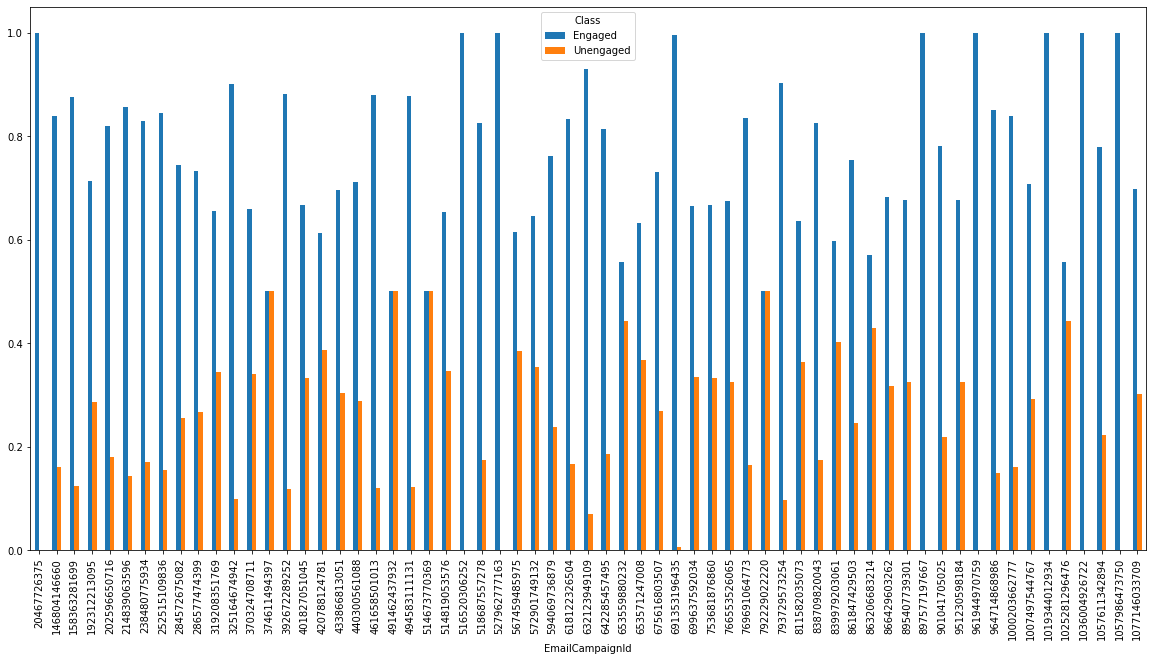

In [39]:
by_email_campaign = user_status_df.groupby("EmailCampaignId").Class.value_counts(normalize=True)
by_email_campaign = by_email_campaign.unstack()
effective_camps = by_email_campaign.loc[by_email_campaign.Engaged >= .5]
effective_camps.plot.bar(figsize=(20,10));
print(len(effective_camps))

23


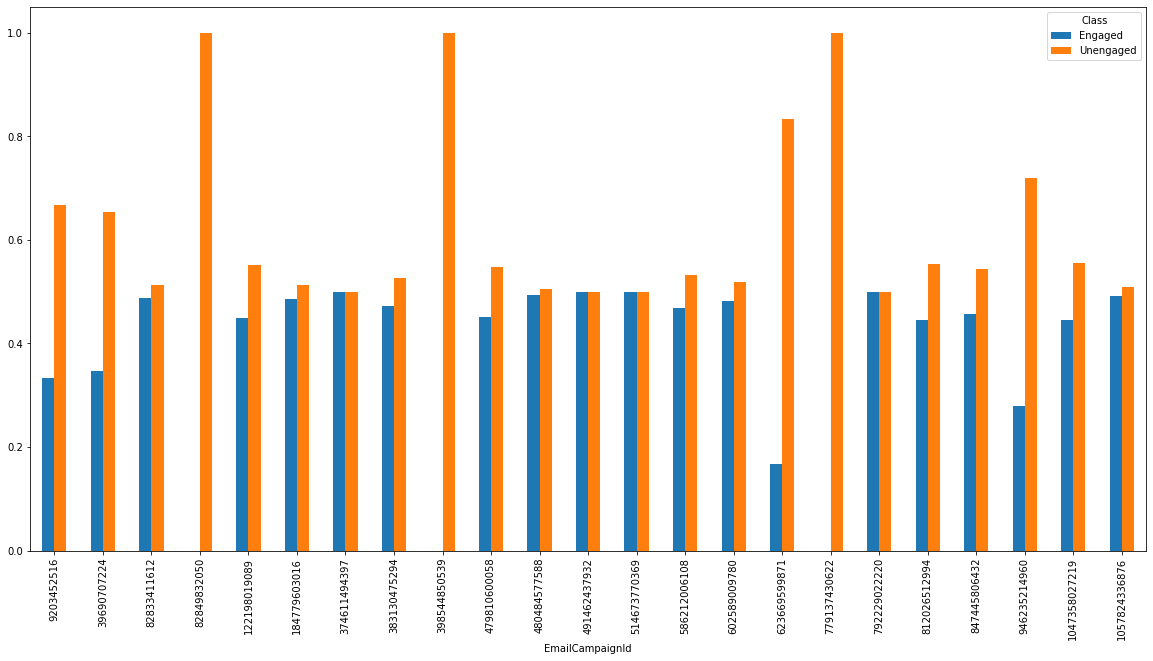

In [40]:
ineffective_camps = by_email_campaign.loc[by_email_campaign.Unengaged >= .5]
ineffective_camps.plot.bar(figsize=(20,10));
print(len(ineffective_camps))

#### Conclusion

I have explored the data based on emails' effectiveness (where email campaign led to click of the link) to engaged and unengaged users. Per record, it shows that about 51% of the users are currently engaged. Overall, the email campaigns are more effective to engaged users by roughly around 8:2 ratio. There were 63 effective email campaigns.